## Fill this cell with your names

- Zenkri,Jihed, Informatique
- El Fasci,Aaron, Informatique

## Carefully follow instructions

**If you don't: no evaluation!**

Write in English or French

The deliverable is a file

- `xxx_yyy.ipynb` file (jupyter notebook) or
- `xxx_yyy.py` file (if you are using `jupytext`) or
- `xxx_yyy.qmd` file (if you are using `quarto`)

where `xxx` and `yyy` are your names, for example `lagarde_michard.ipynb`.

The deliverable is not meant to contain cell outputs.  

The data files used to execute cells are meant to sit in the same directory as the deliverable. Use relative filepaths or urls to denote the data files.   

We **will** execute the code in your notebook: make sure that running all the cells works well.



## Grading <i class="fa graduation-cap"></i>

Here is the way we'll assess your work

| Criterion | Points | Details |
|:----------|:-------:|:----|
|Spelling and syntax | 3 | English/French  |
|Plots correction | 3 |  Clarity / answers the question  |
|Plot style and cleanliness | 3 | Titles, legends, labels, breaks ... |
|Table wrangling | 4 | ETL, SQL like manipulations |
|Computing Statistics | 5 | SQL `goup by`  and aggregation  |
|DRY compliance | 2 | DRY principle at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)|

If we see a single (or more) `for` loop in your code: **-5 points**.  Everything can be done using high-level `pandas` methods

# Preliminaries

## Notebooks: Modus operandi

- This is a [Jupyter Notebook](https://jupyter.org).
- When you execute code within the notebook, the results appear beneath the code.
- [Jupytext](https://github.com/mwouts/jupytext)
- [Quarto](https://quarto.org)

## Packages

- Base `Python` can do a lot. But the full power of `Python` comes from a fast growing collection of `packages`/`modules`.

- Packages are first installed (that is using `pip install` or `conda install`), and if
needed, imported during a session.

- The `docker` image you are supposed to use already offers a lot of packages. You should not need to install new packages.

- Once a package has been installed on your drive, if you want all objects exported by the package to be available in your session, you should import the package, using `from pkg import *`.

- If you just want to pick some subjects from the package,
you can use qualified names like `pkg.object_name` to access the object (function, dataset, class...)


In [ ]:
# importing basic tools
import sys
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os            # file operations
import requests      # networking
import zipfile
import io
from pathlib import Path

from datetime import date  # if needed




In [ ]:
# importing plotting packages
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [ ]:
# make pandas plotly-friendly
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

# Getting the data

## French data

The French data are built and made available by [INSEE](https://www.insee.fr/fr/accueil)  (French Governement Statistics Institute)

Prénoms:
- [https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip)

This dataset has been growing for a while. It has been considered by
social scientists for decades.  Given names are meant to give insights into a variety
of phenomena, including religious observance.

- A glimpse at the body of work can be found in [_L'archipel français_ by Jérome Fourquet, Le Seuil, 2019 ](https://www.seuil.com/ouvrage/l-archipel-francais-jerome-fourquet/9782021406023)

- Read the [File documentation](https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation)

## US data

US data may be gathered from

[Baby Names USA from 1910 to 2021 (SSA)](https://www.kaggle.com/datasets/donkea/ssa-names-1910-2021?resource=download)

See [https://www.ssa.gov/oact/babynames/background.html](https://www.ssa.gov/oact/babynames/background.html)


## British data

English and Welsh data can be gathered from

[https://www.ons.gov.uk/](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesinenglandandwalesfrom1996?utm_source=pocket_saves)




## Download the French data

**QUESTION:** Download the data into a file which relative path is `'./nat2021_csv.zip'`

__Hints:__

- Have a look at  package [`requests`](https://requests.readthedocs.io/en/master/).
- Use magic commands to navigate across the file hierarchy and create subdirectories when needed

In [ ]:
# for French data
params = dict(
    url = 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip',
    dirpath = './',
    timecourse = '',
    datafile = 'nat2021.hdf',
    fpath = 'nat2021_csv.zip'
)

In [ ]:
# modify location  make sure you are in the right directory
# %cd
# %pwd  #
# %ls
# %mkdir # if needed

#first_data is directory who contains the downloaded files for the three countries
if not os.path.isdir("downloaded_files"):
        os.makedirs("downloaded_files")

#hdf_files is directory wherewe store the hdf files
if not os.path.isdir("hdf_files"):
        os.makedirs("hdf_files")

#zip_files is a directory where we store zip files
if not os.path.isdir("zip_files"):
        os.makedirs("zip_files")

my_directory= !(pwd)

#Get the path of downloaded_files using cd and pwd
path_dw_files=my_directory[0]+"/downloaded_files/"

#Get the path of zip_files
path_zip_files=my_directory[0]+"/zip_files/"

#Get the path of hdf_files
path_hdf_files=my_directory[0]+"/hdf_files/"



url = params['url']      # 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2021_csv.zip'
fpath = params['fpath']  # './nat2021_csv.zip'

In [ ]:

if not Path(params['fpath']).exists():
    r = requests.get(params['url'])                # What is the type of `r` ? --> The type of r is a Response object from the requests library.
    z = zipfile.ZipFile((io.BytesIO(r.content)))   # What is the type of `z` ? -->The type of z is a ZipFile object from the zipfile library.
    z.extractall(path='./downloaded_files')




## Download US and British data



In [ ]:
#British Data
url = "https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/datasets/babynamesinenglandandwalesfrom1996/1996tocurrent/babynames1996to2021.xlsx"
response = requests.get(url)
with open(path_dw_files+"Babies_ew.xlsx", "wb") as f:
    f.write(response.content)

#Us Data
url = 'https://www.ssa.gov/oact/babynames/names.zip'
zip_file = path_dw_files+'names.zip'

response = requests.get(url)
open(zip_file, 'wb').write(response.content)

# Extract the contents of the zip file into a directory named 'US_data'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(path_dw_files+'US_data')



## Load the French data in memory

**QUESTION:** Load the data in a `pandas` `DataFrame` called `data`

__Hints:__

- You should obtain a `Pandas dataframe` with 4 columns.
- Mind the conventions used to build the `csv` file.
- Package `pandas` provides the convenient tools.
- The dataset, though not too large, is already demanding.
- Don't hesitate to test your methods on a sample of rows method `sample()` from class `DataFrame` can be helpful.

In [ ]:
# your code here
#Frensh Data
fpath = path_dw_files+"nat2021.csv"

data_fr = pd.read_csv(fpath,delimiter=';')
data_fr.head(n=5)




,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430


## Load US and British data in memory

In [ ]:

#British data
#data_ew1 for boys , data_ew2 for girls
path=path_dw_files+'Babies_ew.xlsx'
data_ew1 = pd.read_excel(path, sheet_name='1' , header=7)
data_ew2 = pd.read_excel(path, sheet_name='2' , header=7)

#Function to reshape the data to have a dataframe with columns [data_name,Count,Year] and add a new column 'gender'

def convert_data(data_name,gender):
    #Replace any value =[x] with 0
    data_name = data_name.replace("[x]", 0)

    #Reshape the first data to have a dataframe with columns [data_name,Count,Year]
    column_list1 = list(data_name.columns)
    data_name = data_name.melt(id_vars='Name', value_vars=column_list1, var_name='Year_Count', value_name='Count')
    data_name['Year'] = data_name['Year_Count'].str.extract('(\d+)').astype(int)
    data_name['Rank_Count'] = data_name['Year_Count'].str.extract('(Rank|Count)')
    data_name['Count'] = data_name['Count'].astype(int)
    data_name.drop('Year_Count', axis=1, inplace=True)
    data_name.drop('Rank_Count', axis=1, inplace=True)
    #Add a new column Gender
    data_name['Gender'] = gender
    return data_name

data_ew1=convert_data(data_ew1,'Male')
data_ew2=convert_data(data_ew2,'Female')

#Concatenate the two dataframes
frames = [data_ew1,data_ew2]
data_ew=pd.concat(frames)

#Rename the columns and change their type to get the same format of french data
def rename_columns(data):
    data=data.rename(columns={'Name': 'firstname' ,'Gender':'gender','Year':'year','Count':'count'})
    data['gender'] = data['gender'].astype('category')
    data['firstname'] = data['firstname'].astype('object')
    data['count'] = data['count'].astype('int64')
    data['year'] = data['year'].astype('float64')
    return data
data_ew=rename_columns(data_ew)


#data_ew.head(5)



In [ ]:
#US Data

# Get a list of all the .txt files in the directory
txt_files = [file for file in os.listdir(path_dw_files+'US_data') if file.endswith('.txt')]
# Loop through each .txt file and create a pandas data frame
data_frames = []
for file in txt_files:
    year = file.split('yob')[1].split('.txt')[0]
    df = pd.read_csv(os.path.join(path_dw_files+'US_data', file), header=None, names=['Name', 'Gender', 'Count'])
    df['Year'] = year
    data_frames.append(df)


# Concatenate all the data frames into a single data frame
data_us = pd.concat(data_frames, ignore_index=True)

#Rename the columns and change their type to get the same format of french data
data_us=rename_columns(data_us)
data_us = data_us.replace(['F','M'], ['Female','Male'])



#data_us.head(5)

## Explore the data

**QUESTION:** Look at the data, Use the attributes `columns`, `dtypes` and the methods `head`, `describe`, to get a feeling of the data.

- This dataset is supposed to report all given names used
for either sex during a year in France since 1900

- The file is made of `652 056` lines and  4 columns.

```
|-- preusuel : object
|-- nombre: int64
|-- sexe: int64
|-- annais: object
```

Each row indicates for a given `preusuel` (prénom usuel, given name), `sexe` (sex), and `annais` (année naissance, birthyear) the `nombre` (number) of babies of the given sex who were given that name during the given year.

|sexe    |preusuel     | annais|   nombre|
|:------|:--------|----:|---:|
|2     |SYLVETTE | 1953| 577|
|1   |BOUBOU   | 1979|   4|
|1   |NILS     | 1959|   3|
|2   |NICOLE   | 2003|  36|
|1   |JOSÉLITO | 2013|   4|


**QUESTION:** Compare memory usage and disk space used by data

**Hints:**

- The method `info`  prints a concise summary of a `DataFrame`.
- With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`.
- Beware that the resulting estimate depends on the argument fed.

In [ ]:


dtypes = {
    "sexe": "int64",
    "nombre": "int64",
     "preusuel" :"object" ,
    "annais": "object"
}


data_fr = pd.read_csv(path_dw_files+"nat2021.csv", dtype=dtypes,delimiter=';')

data_fr.head(n=5)


# memory usage(MB)
memory_usage = data_fr.memory_usage(deep=True).sum()/ (1024 ** 2)
print("memory_usage of data_fr :",memory_usage ,"MB")

# disk space used(MB)
disk_usage = os.path.getsize(path_dw_files+'nat2021.csv')/ (1024 ** 2)
print("dik usage of data_fr",disk_usage,"MB")

# -----> Memory usage is greater then disk usage


memory_usage of data_fr : 93.2921895980835 MB
dik usage of data_fr 11.908041000366211 MB


**QUESTION:** Display the output of `.describe()` with style.

In [ ]:
data_fr.describe().style.format("{:.2%}")




,sexe,nombre
count,68653800.00%,68653800.00%
mean,154.34%,12734.02%
std,49.81%,87490.80%
min,100.00%,100.00%
25%,100.00%,400.00%
50%,200.00%,800.00%
75%,200.00%,2500.00%
max,200.00%,5354700.00%


**QUESTION:** For each column compute the number of distinct values

In [ ]:
distinct_counts = data_fr.nunique()

distinct_counts


sexe            2
preusuel    36170
annais        123
nombre       7281
dtype: int64

# Transformations

## Improving the data types

**QUESTION:** Make `sexe` a category with two levels `Female` and `Male`. Call the new column `gender`. Do you see any reason why this factor should be ordered?

__Hint:__ Read [Pandas and categorical variables](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=category)

In [ ]:
data_fr['gender'] = data_fr['sexe'].astype('category')
data_fr['gender'] = data_fr['gender'].cat.rename_categories(['Male','Female'])

data_fr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686538 entries, 0 to 686537
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   sexe      686538 non-null  int64   
 1   preusuel  686536 non-null  object  
 2   annais    686538 non-null  object  
 3   nombre    686538 non-null  int64   
 4   gender    686538 non-null  category
dtypes: category(1), int64(2), object(2)
memory usage: 21.6+ MB


**QUESTION:** Compare memory usage of columns `sexe` and `gender`

In [ ]:

# memory usage of gender(MB)

gender_memory = data_fr.gender.memory_usage(deep=True)/ (1024 ** 2)
print("Memory usage of 'gender':", gender_memory, "MB")

# memory usage of sexe(MB)

sexe_memory = data_fr.sexe.memory_usage(deep=True)/ (1024 ** 2)
print("dik usage of 'sexe': ",disk_usage,"MB")

#------> sexe_memory is greater then gender_memory

Memory usage of 'gender': 0.6550769805908203 MB
dik usage of 'sexe':  11.908041000366211 MB


**QUESTION:** Would it be more memory-efficient to recode `sexe` using modalities `F` and `M` instead of `Male` and `Female` ?

_Insert your answer here_

> ...When you convert a variable,  'sexe', into a categorical variable with levels 'Female' and 'Male', the mapping from the original string values to integer codes is retained in memory. As a result, the memory usage can be affected by the length of the string values. Specifically, longer strings like 'Female' and 'Male' will consume more memory in comparison to shorter strings like 'F' and 'M'.

## Dealing with missing values

**QUESTION:** Variable `annais` class is `object`. Make `annais` of type `float`. Note that missing years are encoded as "XXXX", find a way to deal with that.

__Hint:__  As of releasing this Homework (2023-01-18), `Pandas` is not very good at managing missing values,
see [roadmap](https://pandas.pydata.org/docs/development/roadmap.html). Don't try to convert `annais` into an integer column.

In [ ]:
#Replace missing years with Nan

data_fr['annais'] = data_fr['annais'].replace("XXXX", np.nan)
data_fr['annais'] = data_fr['annais'].astype(float)

data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686538 entries, 0 to 686537
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   sexe      686538 non-null  int64   
 1   preusuel  686536 non-null  object  
 2   annais    648614 non-null  float64 
 3   nombre    686538 non-null  int64   
 4   gender    686538 non-null  category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 21.6+ MB


## Rename and remove columns

**QUESTION:** Remove useless columns (now that you've created new ones, and rename them). You should end up with a dataframe with columns called `"gender"`, `"year"`, `"count"`, `"firstname`" with the following dtypes:

```python
gender        category
firstname     object
count         int64
year          float64
```

In [ ]:
data_fr = data_fr.drop(columns=[ 'sexe'])
data_fr = data_fr.rename(columns={'annais':'year', 'nombre':'count',"preusuel":"firstname"})
first_column = data_fr.pop('gender')
data_fr.insert(0, 'gender', first_column)

data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686538 entries, 0 to 686537
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   gender     686538 non-null  category
 1   firstname  686536 non-null  object  
 2   year       648614 non-null  float64 
 3   count      686538 non-null  int64   
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 16.4+ MB


**Question:** Do the same thing for British and US data. You should eventually obtain dataframes with the same schema.  

**QUESTION:** How many missing values (NA) have been introduced? How many births are concerned?

In [ ]:
#To count missing values(NA)
nan_count = data_fr.isna().sum()
nan_count

#To count number of births with missing years
births_with_missing_years = data_fr[data_fr['year'].isna()].shape[0]
births_with_missing_years


37924

**QUESTION:** Read the documentation and describe the origin of rows containing the missing values.

In [ ]:
#The numbers of first names fulfilling condition 2 but not condition 3 are grouped together
# (for each sex and each first name) in a record whose year of birth field (ANNAIS)
#takes the value “XXXX”

#These are condition 2 and 3 :
#(2) Over the period from 1946 to 2021, the first name was attributed at least 20 times to persons of gender
#female and/or at least 20 times to males
#(3) For a given year of birth, the first name has been attributed at least 3 times to persons of
#female or male

## Checkpointing: save your transformed dataframes

**QUESTION:** Save the transformed dataframe (retyped and renamed) to `./nat2021_csv.zip`. Try several compression methods.

In [ ]:
import gzip
import shutil

# Write the result to a single .csv file and compress it in a zip file
def data_to_csv_zip(data,name):
      data.to_csv(path_zip_files+name,
               index=False,
               compression="zip")

data_to_csv_zip(data_fr,'nat2021_csv.zip')
data_to_csv_zip(data_ew,'data_ew_csv.zip')
data_to_csv_zip(data_us,'data_us_csv.zip')

#Other method to compress  the csv file of data_fr (tar file)
data_fr.to_csv(path_zip_files+"nat2021_csv.bz2",
               index=False,
               compression="bz2")


**QUESTION:** Save the transformed dataframes (retyped and renamed) to `./nat2021.hdf` using `.hdf` format

In [ ]:
%pip install  tables
#Data to hdf
def data_to_hdf (data,name):
       data.to_hdf(path_hdf_files+name, key='hdf', mode='w', format="table")

data_fr_hdf=data_to_hdf (data_fr,"nat2021")
data_us_hdf=data_to_hdf (data_us,"data_us")
data_ew_hdf=data_to_hdf (data_ew,"data_ew")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


At that point your working directory should look like:

```
├── homework01.py      # if you use `jupytext`
|── homework01.qmd     # if you use `quarto`
├── homework01.ipynb   # if you use `jupyter` `notebook`
├── babies-fr.hdf
├── babies-fr.zip
├── babies-us.hdf
├── babies-us.zip
├── babies-ew.hdf
├── babies-ew.zip
├── births-fr.csv
├── births-fr.hdf
```

**QUESTION:** Reload the data using `read_hdf(...)` so that the resulting dataframes  are properly typed with meaningful and homogeneous column names.

__Hint:__ use `try: ... except` to handle exceptions such as `FileNotFoundError`

In [ ]:

def read_hdf(data_hdf,name) :
    try:
        data_hdf = pd.read_hdf(path_hdf_files+name)
    except (FileNotFoundError, IOError):
        print("Wrong file or file path")

data_fr_hdf = read_hdf(data_fr,'nat2021')
data_us_hdf = read_hdf(data_us,'data_us')
data_ew_hdf = read_hdf(data_ew,'data_ew')



## Some data "analytics" and visualization

**QUESTION**: For each year, compute the total number of Female and Male births and the proportion of Female  births among total births

__Hints:__

- Groupby operations using several columns for the groups return a dataframe with a `MultiIndex` index see [Pandas advanced](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

- Have a look at `MultiIndex`, `reset_index`, `pivot`, `columns.droplevel`

In [ ]:
#Gender count for each country
def gender_counts(data):
    gender_count = data.groupby(['year', 'gender'])['count'].sum()
    gender_count = gender_count.unstack()
    gender_count.columns = ['Female', 'Male']
    gender_count = gender_count.reset_index()
    gender_count['proportion_female'] = gender_count['Female'] / (gender_count['Female'] + gender_count['Male'])
    return gender_count


gender_counts_fr=gender_counts(data_fr)
gender_counts_us=gender_counts(data_us)
gender_counts_ew=gender_counts(data_ew)

gender_counts_fr.head(5)




,year,Female,Male,proportion_female
0,1900.0,177387,237653,0.427397
1,1901.0,195964,257492,0.432157
2,1902.0,204354,261437,0.438725
3,1903.0,207360,261450,0.442311
4,1904.0,214140,264822,0.447092


**QUESTION:** Plot the proportion of female births as a function of year and French, US, en British babynames data. Compare with what you get from `births-fr.hdf`.

Don't forget: title, axes labels, ticks, scales, etc.

Because of what we did before, the `plot` method of a `DataFrame` with be rendered using `plotly`, so you can use this. But you can use also `seaborn` or any other available plotting library that you want.

__Hint:__ Mind the missing values in the `year` column

In [ ]:
import matplotlib.pyplot as plt
#A fucntion to create a plot with the specified title, x-axis label, and y-axis label
def plot(title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

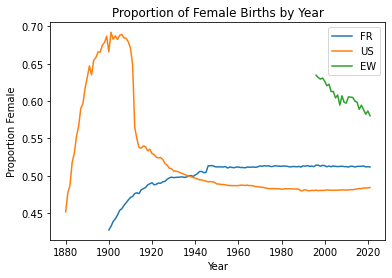

In [ ]:
plt.plot(gender_counts_fr['year'], gender_counts_fr['proportion_female'], label='FR')
plt.plot(gender_counts_us['year'], gender_counts_us['proportion_female'], label='US')
plt.plot(gender_counts_ew['year'], gender_counts_ew['proportion_female'], label='EW')
plt.legend()
plot('Proportion of Female Births by Year','Year','Proportion Female')





**QUESTION:** Make any sensible comment about these plots.

_Insert your answer here_

>Description of the plot :
On one hand , The proportion of female births by year for US is increasing till 1900 then decreases till 1920and remains constant . In the other hand , French names increases at 1900 till 1940 then remains constant .


**QUESTION:** Explore the fluctuations of sex ratio around its mean value since 1945  in the US, in France and in the Great Britain.

Plot deviations of sex ratio around its mean since 1945 as a function of time.

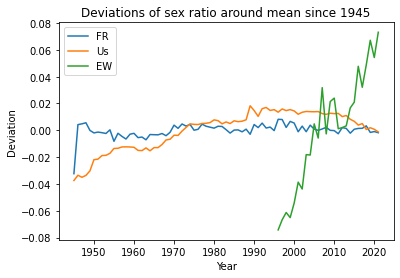

In [ ]:

def sex_ratio(data):
    male_count = data[data['gender'] == 'Male']['count'].sum()
    female_count = data[data['gender'] == 'Female']['count'].sum()
    return male_count / female_count

# Sex_ration by all years
def sex_ratio_years(data_since_1945):
    return  data_since_1945.groupby('year').apply(sex_ratio)


# Deviation of each year's sex ratio from the mean sex ratio
def deviation (data) :
    data_since_1945 = data[data['year'] >= 1945]
    sex_ratio_year=sex_ratio_years(data_since_1945)
    mean_sex_ratio=sex_ratio_years(data_since_1945).mean()
    deviation = sex_ratio_year-mean_sex_ratio
    return deviation




deviation_fr=deviation(data_fr)
deviation_us=deviation(data_us)
deviation_ew=deviation(data_ew)

#Plot the deviation
_,ax = plt.subplots()

ax.plot(deviation_fr.index, deviation_fr.values,label='FR')
ax.plot(deviation_us.index, deviation_us.values,label='Us')
ax.plot(deviation_ew.index, deviation_ew.values,label='EW' )
ax.legend()

plot('Deviations of sex ratio around mean since 1945','Year','Deviation')






In [ ]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686538 entries, 0 to 686537
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   gender     686538 non-null  category
 1   firstname  686536 non-null  object  
 2   year       648614 non-null  float64 
 3   count      686538 non-null  int64   
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 16.4+ MB


**QUESTION:**  Assume that baby gender is chosen at random according to a Bernoulli distribution with success probability $.48$, that baby genders are i.i.d. Perform simulations for sex ratios for French and US data since 1945.

Plot the results, compare with your plots above.  

# The rise, decline and fall of firstnames

**Question:** For each year, country, gender and firstname, compute the popularity rank of the firstname among the names given to babies with that gender, in that country, in that year. The most popular name should be given rank $1$.  

In [ ]:




def name_rank(df):
  #If we have missing values (if i froget to remove them )
  df =df.dropna(subset=['year', 'gender', 'firstname', 'count'])

  #Group the data frame by year, gender, country, and firstname, and compute the sum of the count column for each group
  popularity = df.groupby(['year', 'gender', 'firstname'])['count'].sum().reset_index()

  #Descending order
  popularity = popularity.sort_values(by=['year', 'gender',  'count'], ascending=[True, True, False])

  #Add a new column 'rank'
  popularity['rank'] = popularity.groupby(['year', 'gender'])['count'].rank(method='min', ascending=False).astype(int)
  return popularity

#For franch data , we compute the popularity rank of the firstname without considering '_PRENOMS_RARES'
npr=data_fr[data_fr['firstname'] != '_PRENOMS_RARES']
pop_fr=name_rank(npr)

#For US and EW
pop_us=name_rank(data_us)
pop_fr=name_rank(data_ew)





,year,gender,firstname,count,rank
31834,1996.0,Female,Sophie,7088,1
7103,1996.0,Female,Chloe,6826,2
15978,1996.0,Female,Jessica,6714,3
10338,1996.0,Female,Emily,6419,4
19448,1996.0,Female,Lauren,6304,5



**QUESTION:** For each firstname and sex (some names may be given to girls and boys), compute the total number of times this firstname has been given during `1900-2019`. Print the top 20 firstnames given and style your result dataframe using `background_gradient` for instance.

In [ ]:
names = data_fr.groupby(["firstname", "gender"]).agg({"count": "sum"}).reset_index().sort_values("count", ascending=False).head(20).style.background_gradient()
names


,firstname,gender,count
42863,MARIE,Female,2232235
29474,JEAN,Male,1913420
54986,PIERRE,Male,891947
71929,_PRENOMS_RARES,Female,886692
71928,_PRENOMS_RARES,Male,831985
46960,MICHEL,Male,820429
4400,ANDRÉ,Male,712048
30001,JEANNE,Female,561059
54860,PHILIPPE,Male,538593
38788,LOUIS,Male,528949


## Rare firstnames

**QUESTION:** In the French data, for each sex, plot the proportion of births given `_PRENOMS_RARES` as a function of the year.

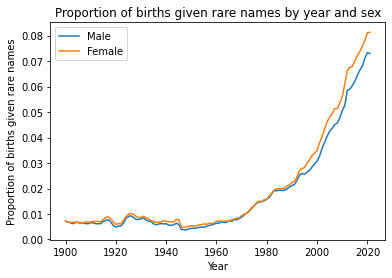

In [ ]:
# Create a DataFrame of total births by year and sex
total_births = data_fr.groupby(['year', 'gender'])['count'].sum().reset_index()

# Create a DataFrame of rare name births by year and sex
rare_births = data_fr[data_fr['firstname'] == '_PRENOMS_RARES'].groupby(['year', 'gender'])['count'].sum().reset_index()

# Calculate the proportion of rare name births
prop_rare_births = rare_births.merge(total_births, on=['year', 'gender'])
prop_rare_births['proportion'] = prop_rare_births['count_x'] / prop_rare_births['count_y']


_,ax = plt.subplots()

M = prop_rare_births[prop_rare_births['gender'] == 'Male']
F = prop_rare_births[prop_rare_births['gender'] == 'Female']

ax.plot(M['year'], M['proportion'], label='Male')
ax.plot(F['year'], F['proportion'], label='Female')

ax.set_xlabel('Year')
ax.set_ylabel('Proportion of births given rare names')
ax.set_title('Proportion of births given rare names by year and sex')
ax.legend()
plt.show()

# A study of the "Marie" firstname

**QUESTION:** Plot the proportion of female births given name `'MARIE'` or `'MARIE-...'` (compounded names) as a function of the year.
Proceed in such a way that the reader can see the share of compounded names. We are expecting an _area plot_.

__Hints:__

- Have a look at the `.str` accessor (to apply a string method over a whole column containing string)
- Have a look at [r-graph-gallery: stacked area](https://www.r-graph-gallery.com/stacked-area-graph.html)  and
at [ggplot documentation](https://ggplot2.tidyverse.org/reference/geom_ribbon.html). Pay attention on the way you stack the area corresponding to names matching pattern 'MARIE-.*' over or under the are corresponding to babies named 'MARIE'
- See Graphique 3, page 48, de _L'archipel français_  de J. Fourquet. Le Seuil. Essais. Vol. 898.

- Add annotation, 1st World War, Front Populaire, 2nd World War, 1968

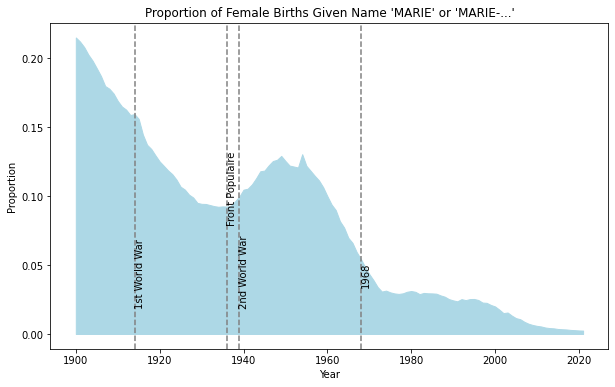

In [ ]:
# Filter for female names starting with "Marie" or "Marie-"
female_marie_names = data_fr[(data_fr["gender"] == "Female") & (data_fr["firstname"].str.startswith("MARIE") | data_fr["firstname"].str.startswith("MARIE-"))]

# Group by year and sum the counts for Marie names and all female names
marie_counts_by_year = female_marie_names.groupby("year")["count"].sum()
all_female_counts_by_year = data_fr[data_fr["gender"] == "Female"].groupby("year")["count"].sum()

# Calculate the proportion of female births with Marie names for each year
proportions_by_year = marie_counts_by_year / all_female_counts_by_year

# Plot the proportions as an area plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(proportions_by_year.index, proportions_by_year.values, color="lightblue")

# Add annotation, 1st World War, Front Populaire, 2nd World War, 1968
ax.axvline(x=1914, color="gray", linestyle="--")
ax.text(1914, 0.02, "1st World War", rotation=90)

ax.axvline(x=1936, color="gray", linestyle="--")
ax.text(1936, 0.08, "Front Populaire", rotation=90)

ax.axvline(x=1939, color="gray", linestyle="--")
ax.text(1939, 0.02, "2nd World War", rotation=90)

ax.axvline(x=1968, color="gray", linestyle="--")
ax.text(1968, 0.035, "1968", rotation=90)

# Set the title and axis labels, and set the y-axis limits
ax.set_title("Proportion of Female Births Given Name 'MARIE' or 'MARIE-...'")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion")
plt.show()


# Top 10 firstnames of year 2000

**QUESTION:** For each sex, select the ten most popular names in year 2000, and plot the proportion
of newborns given that name over time. Take into account that some names might have
zero occurrence during certain years.

__Hint:__ Leave aside the rows with '_PRENOMS_RARES'.

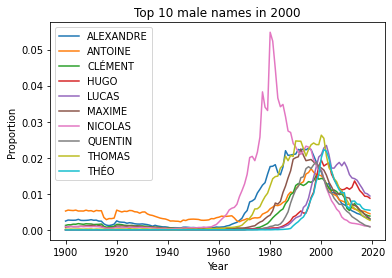

"\nax.plot( prop_top_female,alpha=0.8)\nax.set_title('Top 10 female names in 2000')\nax.set_xlabel('Year')\nax.set_ylabel('Proportion')\nax.legend(labels=prop_top_female.columns, loc='best')\nplt.show()\n"

In [ ]:
# Leave aside the rows with '_PRENOMS_RARES'.
Not_PRENOMS_RARES = data_fr[data_fr['firstname'] != '_PRENOMS_RARES']

# Select 10 most popular names in year 2000 for each sex
top_names_male = Not_PRENOMS_RARES[(Not_PRENOMS_RARES['year'] == 2000) & (Not_PRENOMS_RARES['gender'] == 'Male')].sort_values(by='count', ascending=False).head(10)['firstname'].tolist()
top_names_female = Not_PRENOMS_RARES[(Not_PRENOMS_RARES['year'] == 2000) & (Not_PRENOMS_RARES['gender'] == 'Female')].sort_values(by='count', ascending=False).head(10)['firstname'].tolist()

# Filter by top names
data_top_male = Not_PRENOMS_RARES[(Not_PRENOMS_RARES['gender'] == 'Male') & (Not_PRENOMS_RARES['firstname'].isin(top_names_male))]
data_top_female = Not_PRENOMS_RARES[(Not_PRENOMS_RARES['gender'] == 'Female') & (Not_PRENOMS_RARES['firstname'].isin(top_names_female))]

# Compute proportion of newborns for each name over time
prop_top_male = data_top_male.groupby(['year', 'firstname'])['count'].sum() / Not_PRENOMS_RARES[(Not_PRENOMS_RARES['gender'] == 'Male') & (Not_PRENOMS_RARES['year'] == 2000)]['count'].sum()
prop_top_female = data_top_female.groupby(['year', 'firstname'])['count'].sum() / Not_PRENOMS_RARES[(Not_PRENOMS_RARES['gender'] == 'Female') & (Not_PRENOMS_RARES['year'] == 2000)]['count'].sum()

# Reshape data to wide format and fill missing values with 0
prop_top_male = prop_top_male.unstack()
prop_top_male = prop_top_male.reindex(range(1900, 2020)).fillna(0)

prop_top_female = prop_top_female.unstack()
prop_top_female = prop_top_female.reindex(range(1900, 2020)).fillna(0)

_,ax = plt.subplots()



# Plot proportion of newborns given each name over time for male
ax.plot( prop_top_male)
ax.set_title('Top 10 male names in 2000')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.legend(labels=prop_top_male.columns, loc='best')
plt.show()

# Plot proportion of newborns given each name over time for female
#Uncomment the code to test
"""
ax.plot( prop_top_female,alpha=0.8)
ax.set_title('Top 10 female names in 2000')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.legend(labels=prop_top_female.columns, loc='best')
plt.show()
"""


# Picturing concentration of babynames distributions


Every year, the name counts define a discrete probability distribution over the set of names (the universe).

This distribution, just as an income or wealth distribution, is (usually) far from being uniform. We want to assess how uneven it is.

We use the tools developed in econometrics.

Without loss of generality, we assume that we handle a distribution over positive integers $1, \ldots, n$ where $n$ is the number of distinct names given during a year.

We assume that frequencies $p_1, p_2, \ldots, p_n$ are given in ascending order, ties are broken arbitrarily.

The `Lorenz function` ([Lorenz](https://en.wikipedia.org/wiki/Lorenz_curve) not `Lorentz`) maps $[0, 1] \to [0, 1]$.

$$L(x) = \sum_{i=1}^{\lfloor nx \rfloor} p_i .$$

Note that this is a piecewise constant function.


**Question:** Compute and plot the Lorenz fucntion for a given `sex`, `year` and `country`

**Question:** Design an animated plot that shows the evolution of the Lorenz curve of babynames distribution through the years for a given sex and country.


The Lorenz curve summarizes how far a discrete probability distribution is from the uniform distribution. This is a very rich summary and it is difficult to communicate this message to a wide audience. People tend to favor numerical indices (they don't really understand, but they get used to it): Gini, Atkinson, Theil, ...

The [Gini index](https://en.wikipedia.org/wiki/Gini_coefficient) is twice the surface of the area comprised between curves $y=x$ and $y=L(x)$.

$$G = 2 \times \int_0^1 (x -L(x)) \mathrm{d}x$$

The next formula  allows us to compute it efficiently.

$$G={\frac {2\sum _{i=1}^{n}i p_{i}}{n\sum _{i=1}^{n}p_{i}}}-{\frac {n+1}{n}}.$$


**Question:** Compute and plot Gini index of names distribution over time for sex and countries


# Picturing surges of popularity

In the sequel, the *popularity* of a gendered name in a population during a given year is the proportion of babies of that gender born during that year in that country,  that are given this name.

**Question:** Prepare a data frame that contains for each hype name the 20 years before and 30 years after the maximum popularity is achieved, and, for each such year, the rank and popularity of the hype name. Do this for US and French data.


**Question:** Plot offseted popularity (share of given names within year, country, gender) curves of hype names. Facet by sex and country.

**Question:** Rescale popularity curves so that all of them have maximum $1$.

# Getting help

- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/)

- [plotly](https://plotly.com/python/) for animated plots

- [stackoverflow](https://stackoverflow.com)

- [stackoverflow: pandas](https://stackoverflow.com/questions/tagged/pandas)

- [stackoverflow: plotly+python](https://stackoverflow.com/questions/tagged/plotly+python)

- The US `babynames` analogue of the INSEE file has been a playground for data scientists,
 see [https://github.com/hadley/babynames](https://github.com/hadley/babynames)

- Don't Repeat Yourself (DRY) principle  at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)